In [1]:
!pip install scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
!pip install pymoo

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, confusion_matrix

import skfuzzy as fuzz

In [4]:
iris = datasets.load_iris()
Y = iris.target
X = iris.data

scaler = MinMaxScaler()
scaler.fit(X)
X = scaler.transform(X)

In [5]:
universe = np.arange(0, 1.01, 0.01)

In [6]:
# Funções de pertinencia triangulares com quatro variáveis
def classifica_fuzzy(W, X, Y, plota=True):
    w1, w2, w3, w4 = W

    # Definindo as funções de pertinencia dos antecedentes
    x1_short = fuzz.trimf(universe, [0., 0., w1])
    x1_middle = fuzz.trimf(universe, [0., w1, 1.0])
    x1_long = fuzz.trimf(universe, [w1, 1.0, 1.0])

    x2_short = fuzz.trimf(universe, [0., 0., w2])
    x2_middle = fuzz.trimf(universe, [0., w2, 1.0])
    x2_long = fuzz.trimf(universe, [w2, 1.0, 1.0])

    x3_short = fuzz.trimf(universe, [0., 0., w3])
    x3_middle = fuzz.trimf(universe, [0., w3, 1.0])
    x3_long = fuzz.trimf(universe, [w3, 1.0, 1.0])

    x4_short = fuzz.trimf(universe, [0., 0., w4])
    x4_middle = fuzz.trimf(universe, [0., w4, 1.0])
    x4_long = fuzz.trimf(universe, [w4, 1.0, 1.0])

    # Plota as funções de pertinencia
    if plota:
        
        fig, (ax0, ax1, ax2, ax3) = plt.subplots(nrows=4, figsize=(6, 15))

        ax0.plot(universe, x1_short, 'b', linewidth=1.5, label='short')
        ax0.plot(universe, x1_middle, 'g', linewidth=1.5, label='middle')
        ax0.plot(universe, x1_long, 'r', linewidth=1.5, label='long')
        ax0.set_title('Sepal length - x1')
        ax0.legend()

        ax1.plot(universe, x2_short, 'b', linewidth=1.5, label='short')
        ax1.plot(universe, x2_middle, 'g', linewidth=1.5, label='middle')
        ax1.plot(universe, x2_long, 'r', linewidth=1.5, label='long')
        ax1.set_title('Sepal width - x2')
        ax1.legend()

        ax2.plot(universe, x3_short, 'b', linewidth=1.5, label='short')
        ax2.plot(universe, x3_middle, 'g', linewidth=1.5, label='middle')
        ax2.plot(universe, x3_long, 'r', linewidth=1.5, label='long')
        ax2.set_title('Petal length - x3')
        ax2.legend()

        ax3.plot(universe, x4_short, 'b', linewidth=1.5, label='short')
        ax3.plot(universe, x4_middle, 'g', linewidth=1.5, label='middle')
        ax3.plot(universe, x4_long, 'r', linewidth=1.5, label='long')
        ax3.set_title('Petal width - x4')
        ax3.legend()


    # Ativa as funções de pertinência com os inputs
    x1_short_x = fuzz.interp_membership(universe, x1_short, X[:,0])
    x1_middle_x = fuzz.interp_membership(universe, x1_middle, X[:,0])
    x1_long_x = fuzz.interp_membership(universe, x1_long, X[:,0])

    x2_short_x = fuzz.interp_membership(universe, x2_short, X[:,1])
    x2_middle_x = fuzz.interp_membership(universe, x2_middle, X[:,1])
    x2_long_x = fuzz.interp_membership(universe, x2_long, X[:,1])

    x3_short_x = fuzz.interp_membership(universe, x3_short, X[:,2])
    x3_middle_x = fuzz.interp_membership(universe, x3_middle, X[:,2])
    x3_long_x = fuzz.interp_membership(universe, x3_long, X[:,2])

    x4_short_x = fuzz.interp_membership(universe, x4_short, X[:,3])
    x4_middle_x = fuzz.interp_membership(universe, x4_middle, X[:,3])
    x4_long_x = fuzz.interp_membership(universe, x4_long, X[:,3])

    # Aplica as regras fuzzy
    r11 = np.fmax(x1_short_x, x1_long_x)
    r12 = np.fmax(x2_middle_x, x2_long_x)
    r13 = np.fmax(x3_middle_x, x3_long_x)
    r14 = x4_middle_x
    r1 = np.fmin(np.fmin(np.fmin(r11, r12), r13), r14)

    r21 = np.fmax(x3_short_x, x3_middle_x)
    r22 = x4_short_x
    r2 = np.fmin(r21, r22)

    r31 = np.fmax(x2_short_x, x2_middle_x)
    r32 = x3_long_x
    r33 = x4_long_x
    r3 = np.fmin(np.fmin(r31, r32), r33)

    r41 = x1_middle_x
    r42 = np.fmax(x2_short_x, x2_middle_x)
    r43 = x3_short_x
    r44 = x4_long_x
    r4 = np.fmin(np.fmin(np.fmin(r41, r42), r43), r44)

    versicolor = np.fmax(r1, r4)
    setosa = r2
    virginica = r3

    # O maior valor dentre as tres regras vai ser a classe predita 
    Y_ = np.argmax([setosa, versicolor, virginica], axis=0)
    result = accuracy_score(Y, Y_)

    if plota:
        fig1, ax4 = plt.subplots()
        conf_mat = confusion_matrix(Y, Y_)
        df_cm = pd.DataFrame(conf_mat,index =['Setosa', 'Versicolor', 'Virginica'], columns = ['Setosa', 'Versicolor', 'Virginica'])
        sns.heatmap(df_cm, annot=True)
        plt.ylabel('True label')
        plt.xlabel('Predicted label')
    return result

In [7]:
# Classificação do Especialista
W = [0.40, 0.40, 0.40, 0.40]
classifica_fuzzy(W, X, Y, False)

0.8266666666666667


# Automatizando o valor de W com algoritmo evolutivo

In [8]:
import numpy as np
from pymoo.core.problem import ElementwiseProblem


class W_problem(ElementwiseProblem):
    def __init__(self):
        super().__init__(n_var=4, n_obj=1, n_constr=0, xl=np.zeros(4), xu=np.ones(4))

    def _evaluate(self, x, out, *args, **kwargs):
        out["F"] = [1.0 / (1e-10 + classifica_fuzzy(x, X, Y, False))]

In [9]:
W_problem().evaluate(np.array([0.4, 0.4, 0.4, 0.4]))

array([1.20967742])

In [10]:
from pymoo.optimize import minimize
from pymoo.algorithms.soo.nonconvex.pso import PSO

problem = W_problem()
algorithm = PSO(pop_size=50, w=0.9, c1=2.0, c2=2.0)

res = minimize(problem,
               algorithm,
               seed=1,
               verbose=True)

n_gen  |  n_eval  |    f     |    S    |    w    |    c1    |    c2    |     f_avg     |     f_min    
     1 |       50 |        - |       - |  0.9000 |  2.00000 |  2.00000 |  1.5970556954 |  1.0563380281
     2 |      100 |  0.38805 |       2 |  0.6465 |  2.04061 |  1.95939 |  1.3061308372 |  1.0563380281
     3 |      150 |  0.11847 |       3 |  0.4757 |  2.04010 |  1.97248 |  1.1362607856 |  1.0563380281
     4 |      200 |  0.02640 |       3 |  0.4166 |  2.03298 |  1.99184 |  1.0966906735 |  1.0489510488
     5 |      250 | -5.3E-03 |       3 |  0.3967 |  2.01998 |  2.00904 |  1.0807979114 |  1.0489510488
     6 |      300 | -2.9E-03 |       3 |  0.3982 |  2.00536 |  2.01506 |  1.0712190777 |  1.0489510488
     7 |      350 | -5.5E-05 |       3 |  0.4000 |  1.99523 |  2.02239 |  1.0667597188 |  1.0489510488
     8 |      400 |  0.00177 |       3 |  0.4011 |  1.98672 |  2.03535 |  1.0631396258 |  1.0489510488
     9 |      450 |  0.00439 |       3 |  0.4027 |  1.97613 |  2.04217 | 

In [11]:
print("Best solution found: \nX = %s\nF = %s" % (res.X, 1.0 / res.F))

Best solution found: 
X = [0.99123903 0.54933287 0.24488458 0.41248142]
F = [0.95333333]


0.9533333333333334

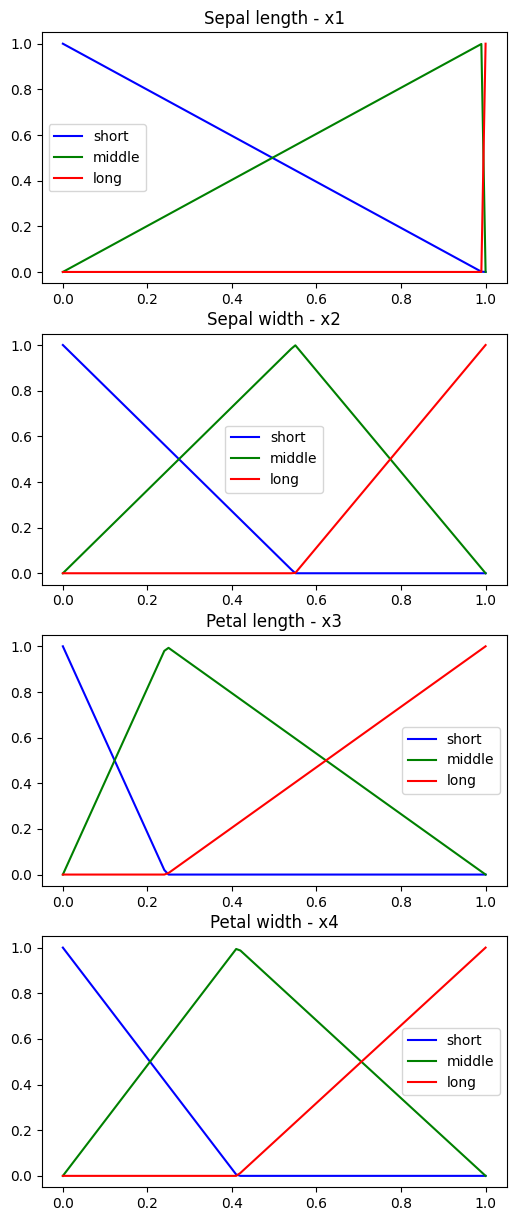

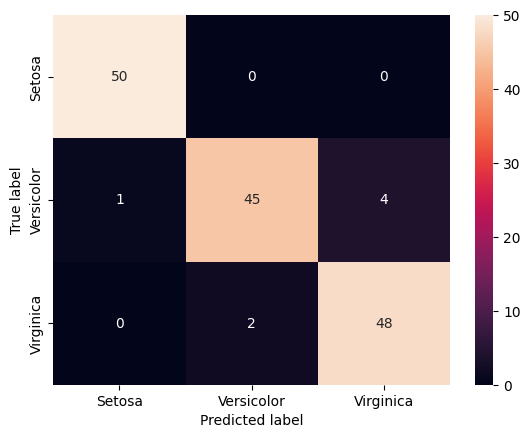

In [12]:
classifica_fuzzy(res.X, X, Y, True)

In [13]:
from pymoo.optimize import minimize
from pymoo.algorithms.soo.nonconvex.ga import GA

problem = W_problem()
algorithm = GA(pop_size=100, eliminate_duplicates=True)

res = minimize(problem,
               algorithm,
               seed=1,
               verbose=True)

n_gen  |  n_eval  |     f_avg     |     f_min    
     1 |      100 |  1.6345743828 |  1.0714285713
     2 |      200 |  1.2278453536 |  1.0714285713
     3 |      300 |  1.1344640581 |  1.0714285713
     4 |      400 |  1.0991645541 |  1.0638297871
     5 |      500 |  1.0782945192 |  1.0563380281
     6 |      600 |  1.0716089048 |  1.0563380281
     7 |      700 |  1.0687036891 |  1.0489510488
     8 |      800 |  1.0665813807 |  1.0489510488
     9 |      900 |  1.0619685528 |  1.0489510488
    10 |     1000 |  1.0575513350 |  1.0416666666
    11 |     1100 |  1.0539064807 |  1.0416666666
    12 |     1200 |  1.0516944908 |  1.0416666666
    13 |     1300 |  1.0471299533 |  1.0416666666
    14 |     1400 |  1.0445804195 |  1.0416666666
    15 |     1500 |  1.0416666666 |  1.0416666666
    16 |     1600 |  1.0416666666 |  1.0416666666
    17 |     1700 |  1.0416666666 |  1.0416666666
    18 |     1800 |  1.0416666666 |  1.0416666666
    19 |     1900 |  1.0416666666 |  1.0416666666


In [14]:
print("Best solution found: \nX = %s\nF = %s" % (res.X, 1.0 / res.F))

Best solution found: 
X = [0.00446343 0.4301238  0.09728874 0.41168106]
F = [0.96]


0.96

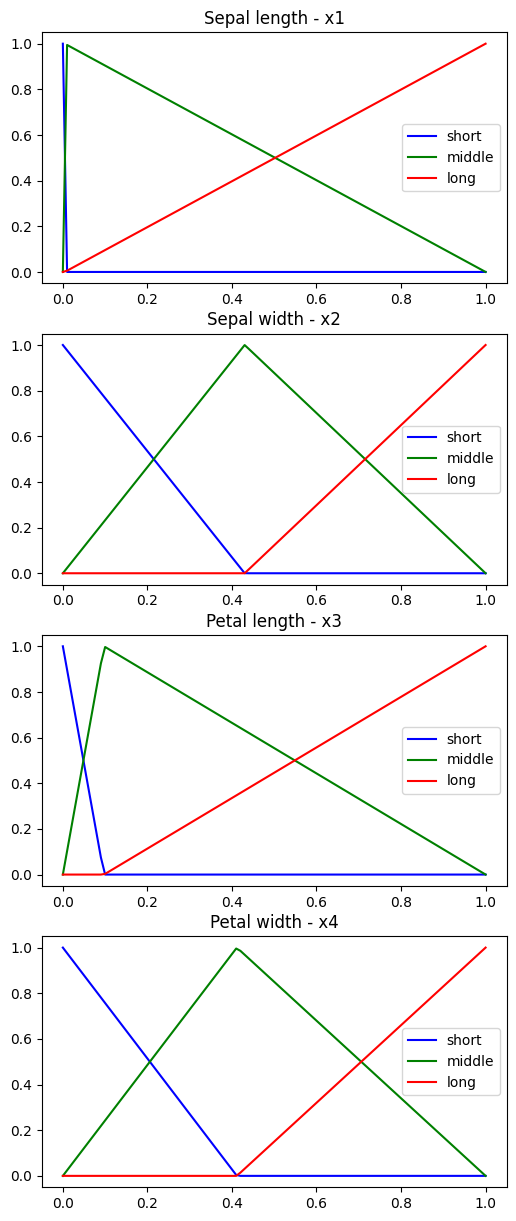

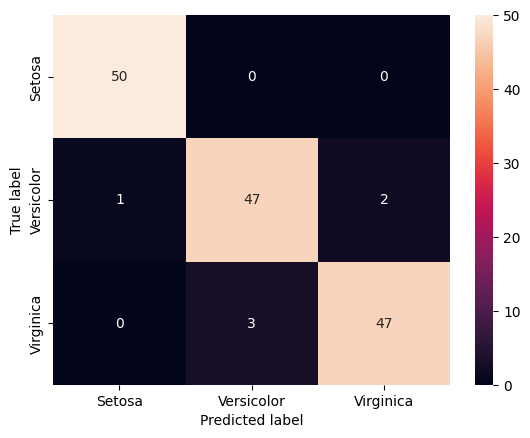

In [15]:
classifica_fuzzy(res.X, X, Y, True)